In [6]:
#HR Analytics - Employee Attrition Analysis
#Objective: Company se employees kyun chhod rahe hain(Attrition)
#Tools: Python, Pandas, Matplotlib,Seaborn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [21]:
import os
os.listdir()

['(n)CodePKIComponent_3_4_2025.txt',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.vscode',
 '3D Objects',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'HR-Employee-Attrition.csv',
 'IdeaProjects',
 'IdeaSnapshots',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Microsoft',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{ddf19ba7-9c76-11f0-bf77-9c305ba6b3ec}.TM.blf',
 'NTUSER.DAT{ddf19ba7-9c76-11f0-bf77-9c305ba6b3ec}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{ddf19ba7-9c76-11f0-bf77-9c305ba6b3ec}.TMContainer00000000000000000002.regtrans-ms',
 'NTUSER.DAT{f9e7a7e0-66a8-11ef-bf39-9c305ba6b3ec}.TM.blf',
 'NTUSER.DAT{f9e7a7e0-66a8-11ef-bf39-9c305ba6b3ec}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{f9e7a7e0-66a8-11ef-bf39-9c305ba6b3ec}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.in

In [22]:
import pandas as pd

In [27]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
df.shape

(1470, 35)

In [30]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [33]:
attrition_rate = df['Attrition'].value_counts(normalize=True)*100
attrition_rate

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

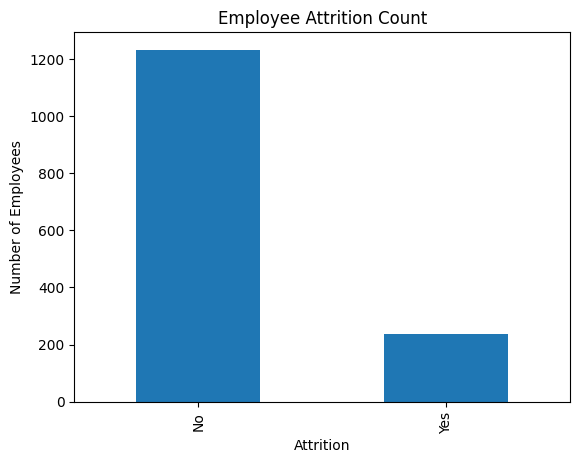

In [35]:
import matplotlib.pyplot as plt

df['Attrition'].value_counts().plot(kind='bar')
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

In [38]:
pd.crosstab(df['Department'],df['Attrition'])            

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


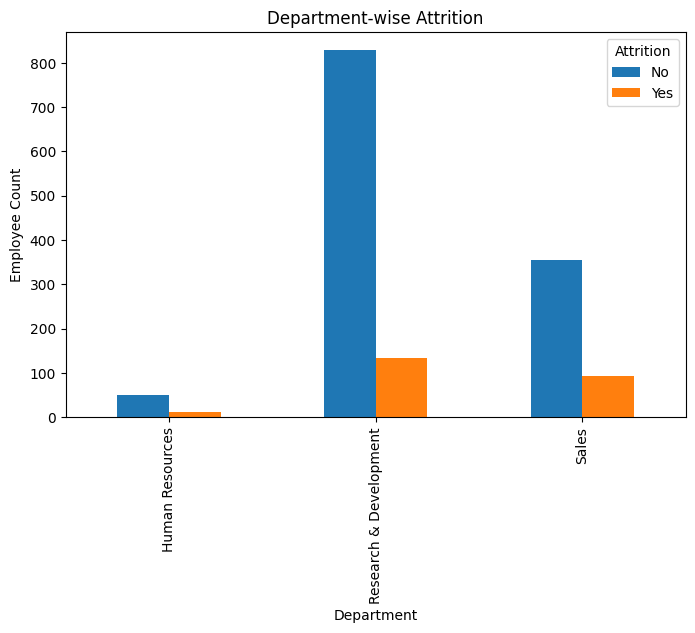

In [39]:
pd.crosstab(df['Department'],
df['Attrition']).plot(kind='bar',
figsize=(8,5))
plt.title('Department-wise Attrition')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.show()


In [40]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [47]:
pd.crosstab(df['Age'],df['Attrition']).head(10)

Attrition,No,Yes
Age,,
18,4,4
19,3,6
20,5,6
21,7,6
22,11,5
23,10,4
24,19,7
25,20,6
26,27,12


In [48]:
bins = [18,25,35,45,55,65]
labels = ['18-25','26-35','36-45','46-55','56+']
df['AgeGroup']=pd.cut(df['Age'],
bins=bins, labels=labels)

In [50]:
pd.crosstab(df['AgeGroup'],
            df['Attrition'])

Attrition,No,Yes
AgeGroup,,
18-25,75,40
26-35,490,116
36-45,425,43
46-55,200,26
56+,39,8


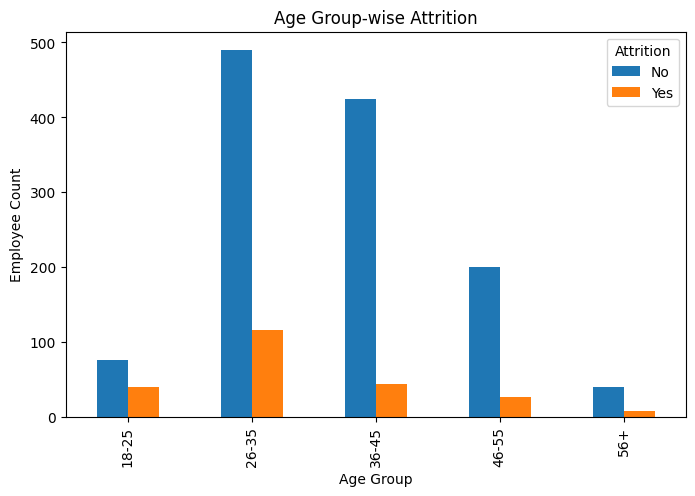

In [51]:
pd.crosstab(df['AgeGroup'],
            df['Attrition']).plot(kind='bar',
                                  figsize=(8,5))
plt.title('Age Group-wise Attrition')
plt.xlabel('Age Group')
plt.ylabel('Employee Count')
plt.show()

In [54]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeGroup'],
      dtype='object')

In [55]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

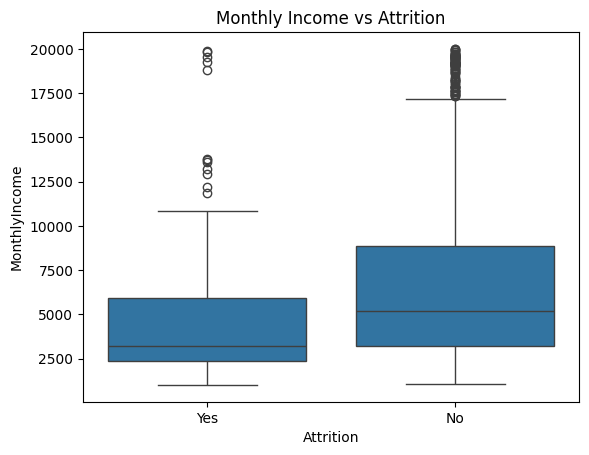

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Attrition',
            y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

In [57]:
pd.crosstab(df['JobRole'],df['Attrition'])

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


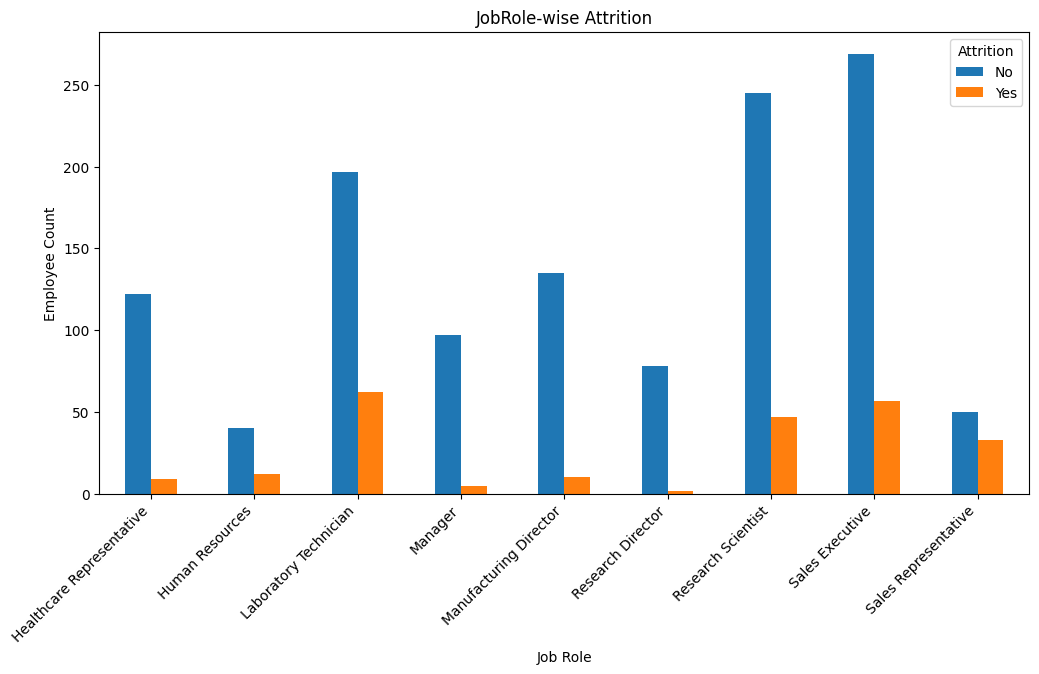

In [59]:
pd.crosstab(df['JobRole'],
            df['Attrition']).plot(
    kind='bar',
    figsize=(12,6)
)
plt.title('JobRole-wise Attrition')
plt.xlabel('Job Role')
plt.ylabel('Employee Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
pd.crosstab(df['WorkLifeBalance'],
            df['Attrition'])

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


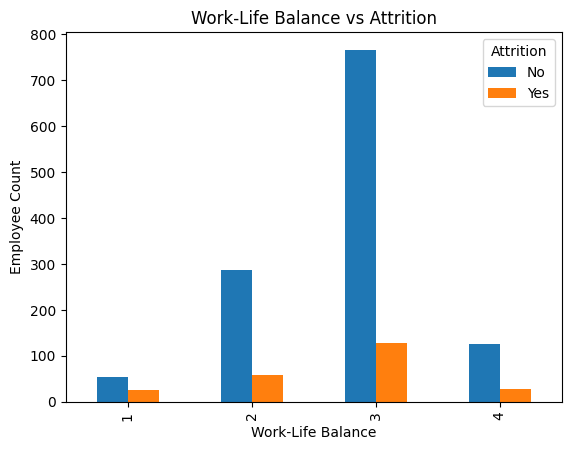

In [61]:
pd.crosstab(df['WorkLifeBalance'],
            df['Attrition']).plot(kind='bar')
plt.title('Work-Life Balance vs Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Employee Count')
plt.show()

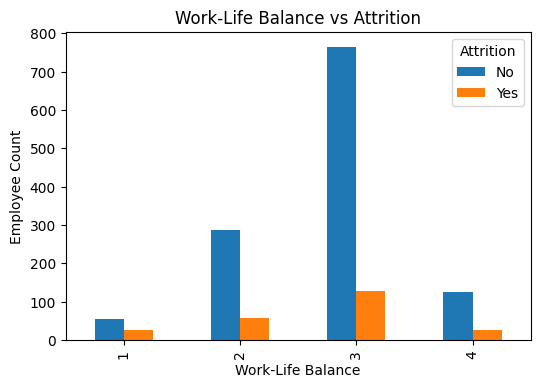

In [62]:
pd.crosstab(df['WorkLifeBalance'],
            df['Attrition']).plot(kind='bar',figsize=(6,4))
plt.title('Work-Life Balance vs Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Employee Count')
plt.show()